# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm # progress bar

### Plotting functions

In [3]:
# We don't use plt.show() because there are times when combine these.


def plot_scatter(x_iterable, y_iterable, x_label="", y_label=""):
    x_array = np.array(x_iterable)
    y_array = np.array(y_iterable)
    plt.scatter(x_array, y_array, color="blue")
    plt.xlabel(x_label)
    plt.ylabel(y_label)


def draw_line(slope, y_intercept, color="grey", linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(
        x, y_intercept + slope * x, linestyle="-", color=color, linewidth=linewidth
    )

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [4]:
def simple_trick(bias, slope, predictor, current_value):
    """
    y ~ bias + slope*predictor

    The simple trick performs small pertubations
    """
    small_random_1 = np.random.random() * 0.1
    small_random_2 = np.random.random() * 0.1

    if predictor == 0:
        return slope, bias

    predicted_value = bias + slope * predictor
    if current_value > predicted_value:
        bias += small_random_2
        if predictor > 0:
            slope += small_random_1
        elif predictor < 0:
            slope -= small_random_1
    if current_value < predicted_value:
        slope -= small_random_1
        if predictor > 0:
            bias -= small_random_2
        elif predictor < 0:
            bias += small_random_2

    return slope, bias


def absolute_trick(bias, slope, predictor, current_value, learning_rate):
    """
    y ~ bias + slope*predictor

    Performs increments wrt a scaled value
    """
    predicted_value = bias + slope * predictor
    if current_value > predicted_value:
        slope += learning_rate * predictor
        bias += learning_rate
    else:
        slope -= learning_rate * predictor
        bias -= learning_rate
    return slope, bias


def square_trick(bias, slope, predictor, current_value, learning_rate):
    """
    y ~ bias + slope*predictor

    Performs increments wrt a scaled value and difference
    """
    predicted_value = bias + slope * predictor
    slope += learning_rate * predictor * (current_value - predicted_value)
    bias += learning_rate * (current_value - predicted_value)
    return slope, bias

### Constructing the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

In [5]:
# We want to be able to use different tricks, so we pass the function as a parameter


def perform_one_epoch(
    bias,
    slope,
    predictor,
    current_value,
    trick_function,
    learning_rate,
):
    """
    There's probably a better way to do this with kwargs
    """
    if learning_rate:
        slope, bias = trick_function(
            bias, slope, predictor, current_value, learning_rate=learning_rate
        )
    else:
        slope, bias = trick_function(bias, slope, predictor, current_value)
    return slope, bias


def simple_linear_regression(
    features,
    labels,
    trick_function=square_trick,
    learning_rate=0.01,
    epochs=10000,
    plot_all_epochs=True,
):
    """
    trick_function must follow y ~ b0 + b1x with parameters:
        bias,
        slope,
        predictor,
        current_value,
        learning_rate (optional for simple_trick)
    """

    slope = np.random.random()
    bias = np.random.random()
    errors = []
    for epoch in tqdm.tqdm(range(epochs)):
        if plot_all_epochs:
            draw_line(slope, bias)
        index_random = np.random.randint(0, len(features) - 1)
        predictor = features[index_random]
        current_value = labels[index_random]
        slope, bias = perform_one_epoch(
            bias, slope, predictor, current_value, trick_function, learning_rate
        )
    draw_line(slope, bias, "black", 0.9)
    plot_scatter(features, labels)
    plt.show()
    
    draw_line(slope, bias, "black", 0.9)
    plot_scatter(features, labels)
    plt.show() 

    return slope, bias

### Adding error metrics to our model

Now our linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.
- Plotting the error function

In [6]:
def rmse(labels, predictions):
    """The root mean square error function"""
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0 / n * (np.dot(differences, differences)))


def mse(labels, predictions):
    """The mean square error function"""
    n = len(labels)
    differences = np.subtract(labels, predictions)
    cost = np.dot(differences, differences) / n
    return cost


def linear_regression(
    features,
    labels,
    trick_function=square_trick,
    learning_rate=0.01,
    error_metric=rmse,  # error function as parameter
    epochs=10000,
    plot_all_epochs=True,
):
    """
    trick_function must follow y ~ b0 + b1x with parameters:
        bias,
        slope,
        predictor,
        current_value,
        learning_rate (optional for simple_trick)
    error_metric must take two arrays and return a scalar

    """
    slope = np.random.random()
    bias = np.random.random()
    errors = []  # logging errors
    for epoch in tqdm.tqdm(range(epochs)):
        if plot_all_epochs:
            draw_line(slope, bias, linewidth=0.5)

        # Scoring predictions and storing error
        predictions = features * slope + bias
        errors.append(error_metric(labels, predictions))

        index_random = np.random.randint(0, len(features) - 1)
        predictor = features[index_random]
        current_value = labels[index_random]
        slope, bias = perform_one_epoch(
            bias, slope, predictor, current_value, trick_function, learning_rate
        )
    draw_line(slope, bias, "black", 0.9)
    plot_scatter(features, labels)
    plt.show()

    draw_line(slope, bias, "black", 0.9)
    plot_scatter(features, labels)
    plt.show()

    # plotting error
    plot_scatter(range(len(errors)), errors, "Number of Epochs", "Numerical Error")
    plt.show()

    return slope, bias

## Example

### Simple Linear Regression

In [7]:
X = np.array([1, 2, 3, 5, 6, 7])
y = np.array([155, 197, 244, 356, 407, 448])

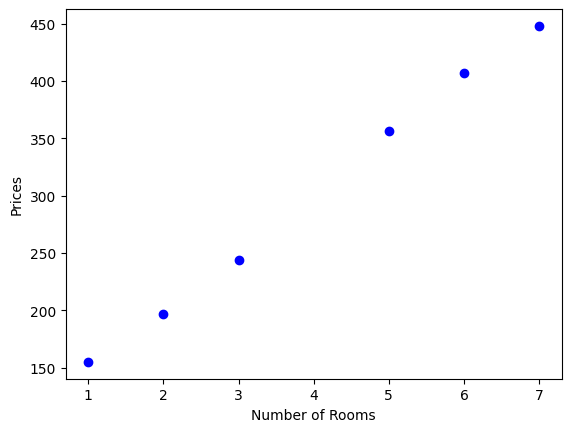

In [8]:
plot_scatter(X, y, "Number of Rooms", "Prices")
plt.show()

100%|██████████| 10000/10000 [00:03<00:00, 3004.27it/s]


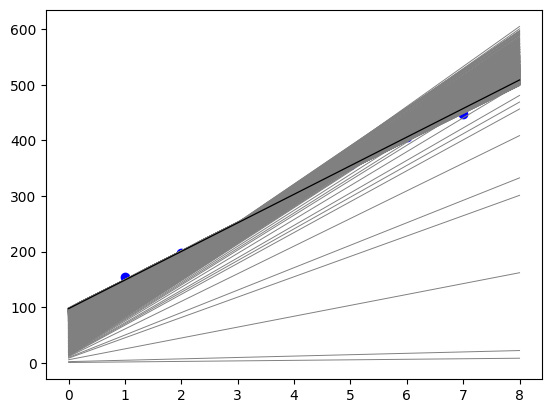

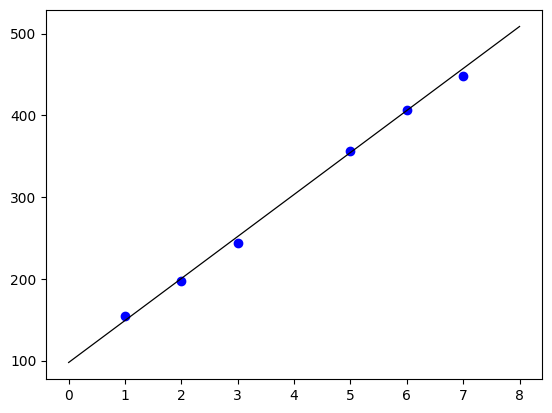

(51.3902909956436, 97.63392035396821)

In [9]:
simple_linear_regression(X, y)

### Linear Regression with Error Metrics

#### Using Root Mean Squared Error

100%|██████████| 10000/10000 [00:03<00:00, 2713.06it/s]


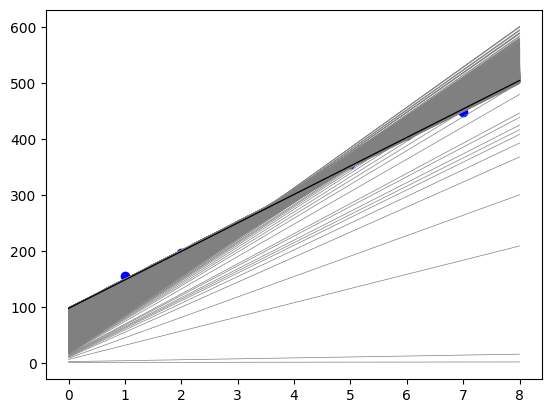

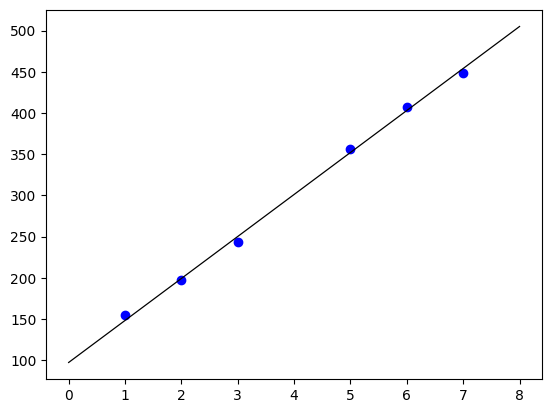

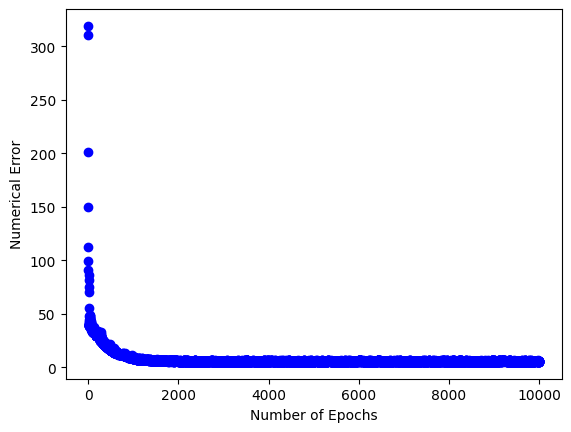

(50.935459275308496, 97.39855719074275)

In [10]:
linear_regression(X, y, error_metric=rmse)

#### Using Mean Squared Error (MSE)

100%|██████████| 10000/10000 [00:03<00:00, 2647.83it/s]


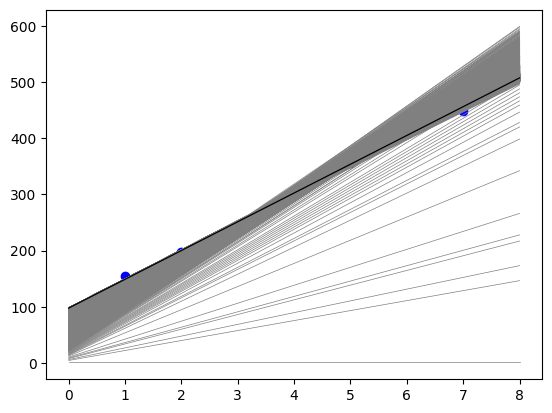

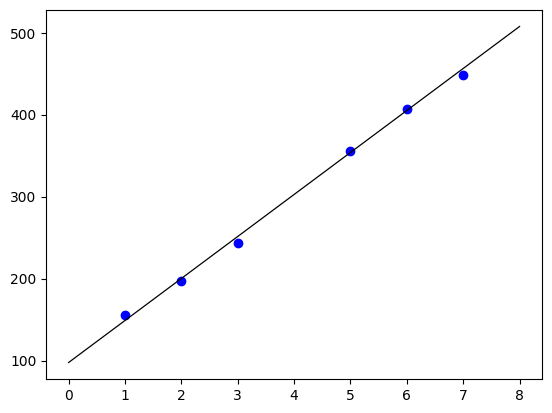

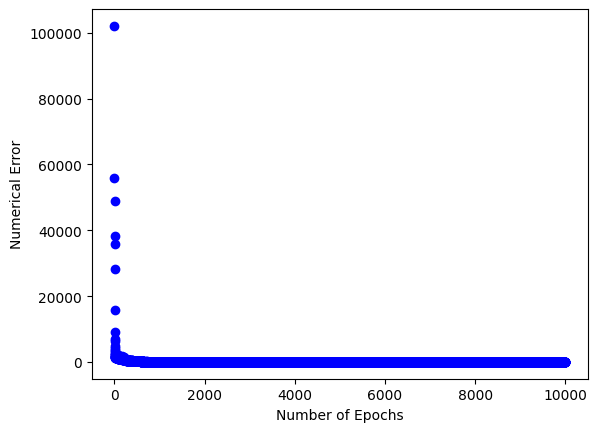

(51.24772644894377, 97.6241527104552)

In [11]:
linear_regression(X, y, error_metric=mse)